In [1]:
import pandas as pd
import numpy as np

In [2]:
#cite：https://blog.csdn.net/IT_SoftEngineer/article/details/107325062
Sig_Eqs= pd.read_csv('earthquakes-2021-10-25_21-26-58_+0800.tsv',encoding='gbk',sep='\t')
Sig_Eqs

,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Country,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-2150.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,JORDAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,SYRIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,GREECE,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6268,NaN,2021.0,9.0,21.0,23.0,15.0,53.0,NaN,NaN,AUSTRALIA,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,46.0,1.0
6269,NaN,2021.0,9.0,27.0,6.0,17.0,22.0,NaN,NaN,GREECE,...,NaN,NaN,20.0,1.0,NaN,3.0,772.0,3.0,NaN,NaN
6270,NaN,2021.0,10.0,6.0,22.0,1.0,8.0,NaN,NaN,PAKISTAN,...,NaN,NaN,229.0,3.0,NaN,2.0,NaN,3.0,NaN,2.0
6271,NaN,2021.0,10.0,12.0,9.0,24.0,3.0,5817.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0


In [3]:
#1.1
Sig_Eqs.groupby(['Country']).sum().sort_values('Deaths', ascending=False)['Deaths'].head(10)

Country
CHINA         2074900.0
TURKEY        1074569.0
IRAN          1011437.0
SYRIA          439224.0
ITALY          434863.0
HAITI          323472.0
AZERBAIJAN     317219.0
JAPAN          278138.0
ARMENIA        191890.0
PAKISTAN       148783.0
Name: Deaths, dtype: float64

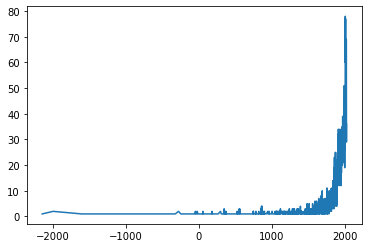

In [4]:
#1.2
import matplotlib.pyplot as plt

Sig_Eqs.loc[(Sig_Eqs['Mag'] >6)]
Sig_Eqs['Total_Number']= 1;
Sig_Eqs1=(Sig_Eqs.groupby(['Year']).sum()).reset_index()

plt.plot(Sig_Eqs1['Year'],Sig_Eqs1['Total_Number'])

In [44]:
#1.3
Sig_Eqs['cYear']=Sig_Eqs['Year'].astype('Int64').astype(str)    
Sig_Eqs['cMo']= Sig_Eqs['Mo'].astype('Int64').astype(str) 
Sig_Eqs['cDy']= Sig_Eqs['Dy'].astype('Int64').astype(str)  

Sig_Eqs['cMo'][Sig_Eqs['Mo']<10] = '0' + Sig_Eqs['cMo'].astype(str)
Sig_Eqs['cDy'][Sig_Eqs['Dy']<10] = '0' + Sig_Eqs['cDy'].astype(str)
Sig_Eqs['Date'] = Sig_Eqs['cYear'] + '/' + Sig_Eqs['cMo'] + '/' + Sig_Eqs['cDy']

def CountEq_LargestEq(C,Sig_Eqs):
  
    Total_Number=Sig_Eqs.loc[(Sig_Eqs['Country']== C )].sum()['Total_Number']
    Sig_Eqs2=Sig_Eqs.loc[(Sig_Eqs['Country']==C )]
    Date=Sig_Eqs2.sort_values('Mag',ascending=False).head(1)['Date']
    Date=Date.values.tolist( )
    return Total_Number,Date[0]                                                    

df = pd.DataFrame(Sig_Eqs['Country'].unique(),columns=['Country'])
df = df.dropna(axis=0)
df['Total_Number'] = 0
df['Date'] = None
for i in range(df.shape[0]):
    df['Total_Number'].iat[i],df['Date'].iat[i] = CountEq_LargestEq(df['Country'].iat[i],Sig_Eqs)

df=df.sort_values('Total_Number', ascending=False)
df

<ipython-input-44-bce088b3b768>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sig_Eqs['cMo'][Sig_Eqs['Mo']<10] = '0' + Sig_Eqs['cMo'].astype(str)
<ipython-input-44-bce088b3b768>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sig_Eqs['cDy'][Sig_Eqs['Dy']<10] = '0' + Sig_Eqs['cDy'].astype(str)


,Country,Total_Number,Date
15,CHINA,610,1668/07/25
33,JAPAN,409,2011/03/11
69,INDONESIA,401,2004/12/26
8,IRAN,380,856/12/22
10,TURKEY,330,1916/01/24
...,...,...,...
94,NORWAY,1,1819/08/31
127,CENTRAL AFRICAN REPUBLIC,1,1921/09/16
125,PALAU,1,1914/10/23
119,KIRIBATI,1,1905/06/30
